<h1><center>Sentiment Analysis of Shopee</center><h1>

## Project Team – Over30
- Donal Ngo         
- Lee Seng            
- Teerapong        
- Wilson Lum Kok Keong   
<br><br>

# Model Training for labeling datasets

## Import Library

In [6]:
from pathlib import Path
import json
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import nltk
from sklearn.preprocessing import LabelEncoder

from nltk import word_tokenize, FreqDist
from datetime import date
from sklearn import utils
import pickle

import sklearn
import re 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import TfidfVectorizer #as vectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [4]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

## Reading in the dataset

In [5]:
# Text preprocesing

import nltk
import re
from nltk.corpus import stopwords
mystopwords=stopwords.words("English") + ['']
WNlemma = nltk.WordNetLemmatizer()

def pre_process(text):
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(text))
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

    tokens = nltk.word_tokenize(processed_tweet)
    tokens = [ t.lower() for t in tokens]
    tokens = [ t for t in tokens if t not in mystopwords]
    text_after_process=" ".join(tokens)
    return(text_after_process)

In [5]:
#Read the csv file 
df = pd.read_csv('data/train.csv')

In [6]:
df

,review_id,review,rating
0,0,Ga disappointed neat products .. Meletot Hilsn...,1
1,1,"Rdtanya replace broken glass, broken chargernya",1
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,3,Sent a light blue suit goods ga want a refund,1
4,4,Pendants came with dents and scratches on its ...,1
...,...,...,...
146806,146806,Excellent product quality delivery speed is ve...,5
146807,146807,thanks gan,5
146808,146808,Awesome awesome quality merchandise value CP ...,5
146809,146809,Nice Packing boxes made effective price .........,5


In [7]:
df.shape

(146811, 3)

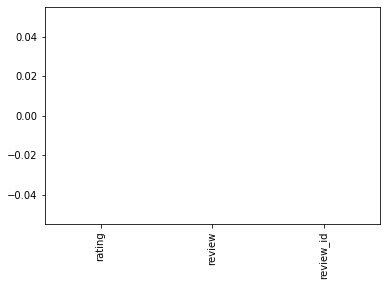

In [8]:
df.isnull().mean().sort_values(ascending=False).plot(kind='bar')

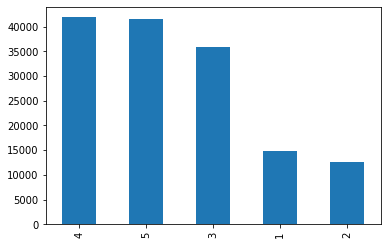

In [9]:
# Get only the raw body text
df['rating'].value_counts(dropna=False).plot(kind='bar')

### Shuffle the datasets for randomness & Equalised the Bullish and Bearish datasets

In [10]:
df['text'] = df.review.apply(pre_process)

In [11]:
df

,review_id,review,rating,text
0,0,Ga disappointed neat products .. Meletot Hilsn...,1,ga disappointed neat products meletot hilsnyaa...
1,1,"Rdtanya replace broken glass, broken chargernya",1,rdtanya replace broken glass broken chargernya
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1,nyesel bngt dsni shopping antecedent photo mes...
3,3,Sent a light blue suit goods ga want a refund,1,sent light blue suit goods ga want refund
4,4,Pendants came with dents and scratches on its ...,1,pendants came dents scratches surface coating ...
...,...,...,...,...
146806,146806,Excellent product quality delivery speed is ve...,5,excellent product quality delivery speed good ...
146807,146807,thanks gan,5,thanks gan
146808,146808,Awesome awesome quality merchandise value CP ...,5,awesome awesome quality merchandise value cp nice
146809,146809,Nice Packing boxes made effective price .........,5,nice packing boxes made effective price fast s...


In [12]:
df['rating'].value_counts()

4    41865
5    41515
3    35941
1    14785
2    12705
Name: rating, dtype: int64

In [13]:
rating_1 = df[df.rating == 1] 
rating_2 = df[df.rating == 2]
rating_3 = df[df.rating == 3] 
rating_4 = df[df.rating == 4]
rating_5 = df[df.rating == 5] 


In [14]:
rating_1_upsampled = utils.resample(rating_1, 
                                 replace=True,     # sample with replacement
                                 n_samples=rating_4.shape[0],    # to match majority class
                                 random_state=42)

In [15]:
rating_1_upsampled.shape

(41865, 4)

In [16]:
rating_2_upsampled = utils.resample(rating_2, replace=True, n_samples=rating_4.shape[0], random_state=42)
rating_3_upsampled = utils.resample(rating_3, replace=True, n_samples=rating_4.shape[0], random_state=42)
rating_5_upsampled = utils.resample(rating_5, replace=True, n_samples=rating_4.shape[0], random_state=42)

In [17]:
rating_2_upsampled.shape

(41865, 4)

In [18]:
df_upsampled = pd.concat([rating_1_upsampled, rating_2_upsampled,rating_3_upsampled,rating_4,rating_5_upsampled])
df_upsampled.shape

(209325, 4)

In [19]:
df_upsampled['rating'].value_counts()

5    41865
4    41865
3    41865
2    41865
1    41865
Name: rating, dtype: int64

In [20]:
df_upsampled

,review_id,review,rating,text
7270,7270,the side of the shirt there who do not terjahi...,1,side shirt terjahit huufftt gmn qc ga yaa ko c...
860,860,I could use ... GK adherents declined wlwpun a...,1,could use gk adherents declined wlwpun already...
5390,5390,"What message does Its ok pretty good, but the ...",1,message ok pretty good service store terrible
13418,13418,No delivery Leads,1,delivery leads
5191,5191,Totally different from the picture . Very diss...,1,totally different picture dissapointed
...,...,...,...,...
139471,139471,👍👍👍much recommended bag... Tha quality is awe...,5,much recommended bag tha quality awesome
114308,114308,Thanks yg sdh awaited come and secure Buy when...,5,thanks yg sdh awaited come secure buy promo suka
112326,112326,Well-packaged Will order again,5,well packaged order
126210,126210,Good quality primer Price was A good product p...,5,good quality primer price good product pack pr...


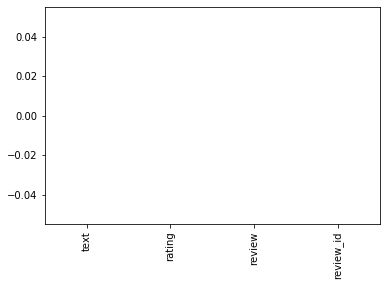

In [21]:
df_upsampled.isnull().mean().sort_values(ascending=False).plot(kind='bar')

In [22]:
df_upsampled.to_csv('data_upsampled.csv',index=False)

In [23]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209325 entries, 7270 to 113224
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   review_id  209325 non-null  int64 
 1   review     209325 non-null  object
 2   rating     209325 non-null  int64 
 3   text       209325 non-null  object
dtypes: int64(2), object(2)
memory usage: 8.0+ MB


In [24]:
df = pd.read_csv('data_upsampled.csv')
df

,review_id,review,rating,text
0,7270,the side of the shirt there who do not terjahi...,1,side shirt terjahit huufftt gmn qc ga yaa ko c...
1,860,I could use ... GK adherents declined wlwpun a...,1,could use gk adherents declined wlwpun already...
2,5390,"What message does Its ok pretty good, but the ...",1,message ok pretty good service store terrible
3,13418,No delivery Leads,1,delivery leads
4,5191,Totally different from the picture . Very diss...,1,totally different picture dissapointed
...,...,...,...,...
209320,139471,👍👍👍much recommended bag... Tha quality is awe...,5,much recommended bag tha quality awesome
209321,114308,Thanks yg sdh awaited come and secure Buy when...,5,thanks yg sdh awaited come secure buy promo suka
209322,112326,Well-packaged Will order again,5,well packaged order
209323,126210,Good quality primer Price was A good product p...,5,good quality primer price good product pack pr...


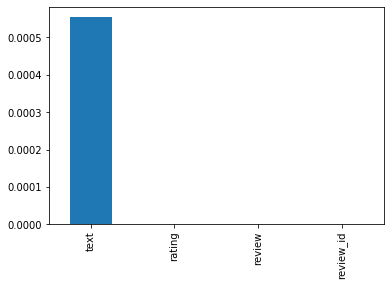

In [25]:
df.isnull().mean().sort_values(ascending=False).plot(kind='bar')

## Prepare dataset into train and test sets

In [26]:
all_data  = df_upsampled.text
all_label = df_upsampled.rating

In [27]:
len(all_data)

209325

In [28]:
len(all_label)

209325

### Using train test split 

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(all_data, all_label, test_size=0.10, random_state=42,shuffle=True)

In [30]:
len(X_train)

188392

In [31]:
len(X_test)

20933

## Vectorise

- Vectorizer the sentences using Tfidf vale
- Make sure test data should be transformed using vectorizer learned from trainning data 

In [32]:
vectorizer = TfidfVectorizer(stop_words=u'english',ngram_range=(1,10),lowercase=True)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

# same feature set
train_vectors.shape

(188392, 3682712)

In [33]:
test_vectors.shape

(20933, 3682712)

In [34]:
indices = np.argsort(vectorizer.idf_)[::-1]
features = vectorizer.get_feature_names()
top_n = 2
top_features = [features[i] for i in indices[:top_n]]
print(top_features)

['𝚠𝚛𝚊𝚙 𝙿𝚊𝚐𝚒 𝚙𝚎𝚜𝚊𝚗 𝚜𝚒𝚊𝚗𝚐 𝚕𝚐𝚜 𝚍𝚒𝚔𝚒𝚛𝚒𝚖 𝚜𝚊𝚋𝚝𝚞 𝚙𝚎𝚜𝚊𝚗 𝚑𝚊𝚛𝚒 𝚜𝚎𝚗𝚒𝚗', 'karana cepet usual']


In [35]:
import pickle
# Dump the file
pickle.dump(train_vectors, open("tfidf_train_vectors.pkl", "wb"))
pickle.dump(vectorizer, open("tfidf_train_vectorizer.pkl", "wb"))

In [36]:
len(indices)

3682712

In [ ]:
features

## Applying different Machine learning model

### Define Functions

In [37]:
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

def classification_model(model, X_train, y_train, X_test, y_test):
  #Fit the model:
  
  model.fit(X_train,y_train)

  print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
  print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))  
    
  #Make predictions on training set:
  predictions = model.predict(X_test)
     
  # Get performance metrics
  cm = confusion_matrix(y_test,predictions)
  print(metrics.classification_report(y_test,predictions))
  score = compute_score(clf=model, X=X_test, y=y_test, scoring='accuracy')
  r2_score = metrics.r2_score(y_test,predictions)
  
  # Print performance metrics

  print ('*************************************************************')
  print ('Metric Performance of : {0}\n'.format(model.__class__))
  print('Confusion Matrix : \n', cm)
  print ('Cross Validation Score = {0:.3%}\n'.format(score))
  print ("Coefficient of determination:{0:.3f}".format(r2_score))
   
  #Fit the model again so that it can be refered outside the function:
  model.fit(X_train,y_train)

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_



### Apply NB mode

In [38]:
clf_NB = MultinomialNB().fit(train_vectors, Y_train)
predNB = clf_NB.predict(test_vectors)
pred = list(predNB)

print(metrics.confusion_matrix(Y_test, pred))
print(metrics.classification_report(Y_test, pred))

[[3850  116  153   20   40]
 [ 114 3786  119   31   42]
 [ 200  387 3156  193  250]
 [ 224  328  603 1408 1599]
 [  92  158  375  876 2813]]
              precision    recall  f1-score   support

           1       0.86      0.92      0.89      4179
           2       0.79      0.93      0.85      4092
           3       0.72      0.75      0.73      4186
           4       0.56      0.34      0.42      4162
           5       0.59      0.65      0.62      4314

    accuracy                           0.72     20933
   macro avg       0.70      0.72      0.70     20933
weighted avg       0.70      0.72      0.70     20933



### MaxEnt = LogisticRegression

In [39]:
clf_ME = LogisticRegression(random_state=0, solver='lbfgs').fit(train_vectors, Y_train)
predME = clf_ME.predict(test_vectors)
pred = list(predME)
print(metrics.confusion_matrix(Y_test, pred))
print(metrics.classification_report(Y_test, pred))

[[3749  177  110  107   36]
 [ 333 3379  167  150   63]
 [ 368  418 2646  486  268]
 [ 261  198  555 1699 1449]
 [ 196  156  437 1123 2402]]
              precision    recall  f1-score   support

           1       0.76      0.90      0.83      4179
           2       0.78      0.83      0.80      4092
           3       0.68      0.63      0.65      4186
           4       0.48      0.41      0.44      4162
           5       0.57      0.56      0.56      4314

    accuracy                           0.66     20933
   macro avg       0.65      0.66      0.66     20933
weighted avg       0.65      0.66      0.66     20933



### KNN Classifier

In [40]:
def train_knn(X, y, k, weight):
    """
    Create and train the k-nearest neighbor.
    """
    knn = KNeighborsClassifier(n_neighbors = k, weights = weight, metric = 'cosine', algorithm = 'brute')
    knn.fit(X, y)
    return knn

In [41]:
kn = train_knn(train_vectors, Y_train, 20, 'distance') # distance weights - by inverse of distance
predKN = kn.predict(test_vectors)
pred = list(predKN)
print(metrics.confusion_matrix(Y_test, pred))
print(metrics.classification_report(Y_test, pred))

[[3980  116   40   22   21]
 [  87 3894   61   28   22]
 [ 266  314 3166  244  196]
 [ 418  366  587 1568 1223]
 [ 156  180  323 1089 2566]]
              precision    recall  f1-score   support

           1       0.81      0.95      0.88      4179
           2       0.80      0.95      0.87      4092
           3       0.76      0.76      0.76      4186
           4       0.53      0.38      0.44      4162
           5       0.64      0.59      0.62      4314

    accuracy                           0.72     20933
   macro avg       0.71      0.73      0.71     20933
weighted avg       0.71      0.72      0.71     20933



In [1]:
filename = 'finalized_KNN_model.sav'
#pickle.dump(kn, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_vectors, Y_test)  
print(result)

In [9]:
train_vectors = pickle.load(open("tfidf_train_vectors.pkl", "rb"))
vectorizer = pickle.load(open("tfidf_train_vectorizer.pkl", "rb"))

### Apply SVM model

In [43]:
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
            decision_function_shape='ovo', degree=3, gamma=3, kernel='rbf',
            max_iter=-1, probability=True, random_state=None, shrinking=True,
            tol=0.001, verbose=True)
svm_model = svm_model.fit(train_vectors, Y_train)

[LibSVM]

In [ ]:
predicted = svm_model.predict(test_vectors)

In [ ]:
print(metrics.confusion_matrix(Y_test, predicted))
print(np.mean(predicted == Y_test) )
print(metrics.classification_report(Y_test, predicted))

In [ ]:
filename = 'finalized_SVM_model.sav'
pickle.dump(svm_model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_vectors, Y_test)  
print(result)

## Predict Test data

In [10]:
#Read the csv file 
test_df = pd.read_csv('data/test.csv')
test_df['rating']='--'
test_df

,review_id,review,rating
0,1,"Great danger, cool, motif and cantik2 jg model...",--
1,2,One of the shades don't fit well,--
2,3,Very comfortable,--
3,4,Fast delivery. Product expiry is on Dec 2022. ...,--
4,5,it's sooooo cute! i like playing with the glit...,--
...,...,...,...
60422,60423,Product has been succesfully ordered and shipp...,--
60423,60424,Opening time a little scared. Fear dalemnya de...,--
60424,60425,The product quality is excellent. The origina...,--
60425,60426,They 're holding up REALLY well also .,--


In [11]:
test_df['text'] = test_df.review.apply(pre_process)

In [12]:
filename = 'finalized_KNN_model.sav'

knn_model = pickle.load(open(filename, 'rb'))

In [13]:
for i in range (len(test_df)):
    if i%1000==0:
        print('batch:',i+1)
    
    # Read in test text and vectorised it
    text_vectors = vectorizer.transform([test_df.text[i]])
    
    # Predict category
    preds = knn_model.predict(text_vectors)
    test_df['rating'][i] = preds[0]

batch: 1
batch: 1001
batch: 2001
batch: 3001
batch: 4001
batch: 5001
batch: 6001
batch: 7001
batch: 8001
batch: 9001
batch: 10001
batch: 11001
batch: 12001
batch: 13001
batch: 14001
batch: 15001
batch: 16001
batch: 17001
batch: 18001
batch: 19001
batch: 20001
batch: 21001
batch: 22001
batch: 23001
batch: 24001
batch: 25001
batch: 26001
batch: 27001
batch: 28001
batch: 29001
batch: 30001
batch: 31001
batch: 32001
batch: 33001
batch: 34001
batch: 35001
batch: 36001
batch: 37001
batch: 38001
batch: 39001
batch: 40001
batch: 41001
batch: 42001
batch: 43001
batch: 44001
batch: 45001
batch: 46001
batch: 47001
batch: 48001
batch: 49001
batch: 50001
batch: 51001
batch: 52001
batch: 53001
batch: 54001
batch: 55001
batch: 56001
batch: 57001
batch: 58001
batch: 59001
batch: 60001


In [14]:
test_df = test_df.drop(['review','text'], axis=1)


In [15]:
test_df = test_df[['review_id','rating']]

In [16]:
test_df

,review_id,rating
0,1,2
1,2,2
2,3,4
3,4,1
4,5,5
...,...,...
60422,60423,3
60423,60424,1
60424,60425,4
60425,60426,5


## Save Predictions for Submission

In [17]:
test_df.to_csv('KNN2-submission.csv', index=False)